# Load data

In [1]:
import sys
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind as ttest
import pandas as pd
from sklearn.preprocessing import StandardScaler


import numpy as np
import os
from sklearn.decomposition import PCA
from mpl_toolkits import mplot3d
basepath = r"C:\Users\Federico\Documents\GitHub\APA_setup"
os.chdir(basepath)

sys.path.append("./")
sys.path.append(basepath)
sys.path.append(os.path.join(basepath, "analysis"))


from fcutils.plot.distributions import plot_kde
from fcutils.plot.figure import clean_axes
from analysis.process_data import DataProcessing
from analysis.fixtures import colors, sensors
from myterial import indigo, blue_grey_dark, salmon, cyan_dark

data = DataProcessing.reload()

WT = data.data.loc[data.data.condition == "WT"].reset_index()
CTRL = data.data.loc[data.data.condition == "CTRL"].reset_index()
DTR = data.data.loc[data.data.condition == "DTR"].reset_index()
DTR_c57 = data.data.loc[(data.data.condition == "DTR")&(data.data.strain == "C57")].reset_index()
DTR_vglut = data.data.loc[(data.data.condition == "DTR")&(data.data.strain == "VGLUT")].reset_index()

data.data.groupby("condition").count()

[07/11/22 23:20:24] WARNING  Could not start TPD recorder: [WinError 32] The   ]8;id=816177;file://C:\Users\Federico\Documents\GitHub\APA_setup\analysis\__init__.py\__init__.py]8;;\:]8;id=299194;file://C:\Users\Federico\Documents\GitHub\APA_setup\analysis\__init__.py#14\14]8;;\
                             process cannot access the file because it is                    
                             being used by another process: 'logs\\log.log'                  

                    INFO     Starting data pre-processing with trials     ]8;id=149970;file://C:\Users\Federico\Documents\GitHub\APA_setup\analysis\process_data.py\process_data.py]8;;\:]8;id=127470;file://C:\Users\Federico\Documents\GitHub\APA_setup\analysis\process_data.py#121\121]8;;\
                             file: F:\Egzona\Forceplate\240522_ALL_trials                    
                             _2022_analysis.csv.                                             

                    INFO     Caliration file: F:\Egzona\Forceplate\forcep ]8;id=313466;file://C:\Users\Federico\Documents\GitHub\APA_setup\analysis\process_data.py\process_data.py]8;;\:]8;id=719672;file://C:\Users\Federico\Documents\GitHub\APA_setup\analysis\process_data.py#124\124]8;;\
                             latesensors_calibration4.csv.                                   

                    INFO     Found 36 subfolders                           ]8;id=900907;file://C:\Users\Federico\Documents\GitHub\APA_setup\analysis\process_data.py\process_data.py]8;;\:]8;id=13717;file://C:\Users\Federico\Documents\GitHub\APA_setup\analysis\process_data.py#55\55]8;;\

                    DEBUG    Setting previously stored params: {'DEBUG':   ]8;id=974216;file://C:\Users\Federico\Documents\GitHub\APA_setup\analysis\process_data.py\process_data.py]8;;\:]8;id=48650;file://C:\Users\Federico\Documents\GitHub\APA_setup\analysis\process_data.py#91\91]8;;\
                             True, 'CONDITIONS': ['WT', 'CTRL', 'DTR',                       
                             'CNO'], 'STRAINS': ['C57', 'VGLUT'],                            
                             'STANDING_STILL': False, 'calibrate': True,                     
                             'weight_percentage': True, 'correct_for_paw':                   
                             True, 'frames_file': 'F:\\Egzona\\Forceplate\                   
                             \240522_ALL_trials_2022_analysis.csv',                          
                             'calibration_file': 'F:\\Egzona\\Forceplate\\                   
                             forceplatesensors_calibration4.csv',                            
                             'main_fld': 'F:\\Egzona\\Forceplate\\CURRENT                    
                             ANALYSIS TRIALS', 'fps': 600,                                   
                             'smoothing_window': 0.01,                                       
                             'on_sensor_weight_th': 2,                                       
                             'on_all_sensors_weight_th': 66,                                 
                             'n_secs_before': 0.2, 'n_secs_after': 0.2,                      
                             'min_baseline_duration': 0,                                     
                             'trial_start_detection_window': 0.15,                           
                             'plot_individual_trials': False}                                

                    INFO     Starting data pre-processing with trials     ]8;id=180324;file://C:\Users\Federico\Documents\GitHub\APA_setup\analysis\process_data.py\process_data.py]8;;\:]8;id=257593;file://C:\Users\Federico\Documents\GitHub\APA_setup\analysis\process_data.py#121\121]8;;\
                             file: F:\Egzona\Forceplate\240522_ALL_trials                    
                             _2022_analysis.csv.                                             

                    INFO     Caliration file: F:\Egzona\Forceplate\forcep ]8;id=167481;file://C:\Users\Federico\Documents\GitHub\APA_setup\analysis\process_data.py\process_data.py]8;;\:]8;id=326407;file://C:\Users\Federico\Documents\GitHub\APA_setup\analysis\process_data.py#124\124]8;;\
                             latesensors_calibration4.csv.                                   

                    INFO     Loading previously saved data from:           ]8;id=5218;file://C:\Users\Federico\Documents\GitHub\APA_setup\analysis\process_data.py\process_data.py]8;;\:]8;id=60520;file://C:\Users\Federico\Documents\GitHub\APA_setup\analysis\process_data.py#96\96]8;;\
                             F:\Egzona\Forceplate\CURRENT ANALYSIS                           
                             TRIALS\data.h5                                                  

                    INFO     Loaded 61 trials -----                       ]8;id=581801;file://C:\Users\Federico\Documents\GitHub\APA_setup\analysis\process_data.py\process_data.py]8;;\:]8;id=143810;file://C:\Users\Federico\Documents\GitHub\APA_setup\analysis\process_data.py#103\103]8;;\
                                                                                             
                                                                                             

,name,fr,fl,hr,hl,CoG,CoG_centered,strain,tot_weight,on_sensors,movement_onset_frame,video,original_fps,paw
condition,,,,,,,,,,,,,,
WT,61,61,61,61,61,61,61,61,61,61,61,61,61,61


# APA analysis

## Define functions

In [2]:
def get_traces(condition_trials:pd.DataFrame, t0=85, t1=140, subtractbl=True)->np.ndarray:
    """
        Get traces for all trials in a condition between the
        two reference frames. Returns an array of shape (4, n_frames, n_trials).
    """
    traces = np.zeros((4, t1 - t0, len(condition_trials)))

    for i, trial in condition_trials.iterrows():
        for n, paw in enumerate(sensors):
            bl = np.mean(trial[paw][0:85]) if subtractbl else 0
            traces[n, :, i] = trial[paw][t0:t1] -  bl  # remove baseline

    return traces


def get_explained_variance(model, X)-> np.ndarray:
    """
        Compute the fraction of variance explained by each PC
        of `model` when transforming data `X` (a single trial/avg trace).

        Returns a vector with variance for each component.
    """
    result = np.zeros(model.n_components)
    for ii in range(model.n_components):
        X_trans = model.transform(X)
        X_trans_ii = np.zeros_like(X_trans)
        X_trans_ii[:, ii] = X_trans[:, ii]
        X_approx_ii = model.inverse_transform(X_trans_ii)

        result[ii] = 1 - (np.linalg.norm(X_approx_ii - X) /
                          np.linalg.norm(X - model.mean_)) ** 2
    return result


def get_trials_variance_explained(pca, traces:np.ndarray, shuffle=False)->dict:
    """
        Compute the fraction of variance explained by each PC for each trial
        in a dataset `traces` of shape (4, n_frames, n_trials).

        If shuffle is true, the data are shuffled between the paws.
        ---- old: changed: shuffle=True shuffles data in TIME, not between PAWS
    """
    # get variance explained for each trial
    variance_explained = {i:[] for i in range(pca.n_components)}
    for i in range(traces.shape[-1]):
        trialtrace = traces[:,:,i].T
        if shuffle:
            trialtrace = trialtrace[:, np.random.permutation(trialtrace.shape[-1])]
            # trialtrace = trialtrace[np.random.permutation(trialtrace.shape[0]), :]

        explained = get_explained_variance(pca, trialtrace)
        for i in range(pca.n_components):
            variance_explained[i].append(explained[i])
    return variance_explained


def transform(x, scaler:StandardScaler):
    """
        Apply standard scaling and reshape
    """
    transformed = np.zeros((x.shape[1], x.shape[0], x.shape[2]))
    for i in range(x.shape[2]):
        transformed[:, :, i] = scaler.transform(x[:, :, i].T)
    return np.transpose(transformed, (1, 0, 2))

def plot_variance_kde(ax, variance_explained:dict, color="k", label="", alpha=0.1, n_pc=2):
    """
        Plot the variance explained by each PC as a KDE
    """
    variance_explained = np.vstack(list(variance_explained.values())).T  # turn into a numpy array
    X = np.sum(variance_explained[:, 0:n_pc], 1) # sum first n PCs


    plot_kde(ax, data=X, color=color, label=label, lw=3, alpha=alpha, kde_kwargs=dict(bw=.05))
    ax.plot([np.median(X), np.median(X)], [0, 3.5], color=color, lw=4, solid_capstyle="round")

# Fit PCA

## Prep.

Data scaling and averaging

In [3]:
# frames ranges for cutting traces
trial_start_frame = 0
trial_end_frame = 239
APA_start_frame = 85

In [4]:
# get complete trial traces
wt_traces_complete = get_traces(WT, t0=trial_start_frame, t1=trial_end_frame)
ctrl_traces_complete = get_traces(CTRL, t0=trial_start_frame, t1=trial_end_frame)
dtr_traces_complete = get_traces(DTR, t0=trial_start_frame, t1=trial_end_frame)
dtrc57_traces_complete = get_traces(DTR_c57, t0=trial_start_frame, t1=trial_end_frame)
dtrvglut_traces_complete = get_traces(DTR_vglut, t0=trial_start_frame, t1=trial_end_frame)

# fit a standard scaler to all data
alldata = np.concatenate([wt_traces_complete, ctrl_traces_complete, dtr_traces_complete], 2).reshape(4, -1)
scaler = StandardScaler().fit(alldata.T)

# apply scaling to traces in the relevant time frame
wt_traces = transform(get_traces(WT, t0=APA_start_frame, t1=trial_end_frame), scaler)
ctrl_traces = transform(get_traces(CTRL, t0=APA_start_frame, t1=trial_end_frame), scaler)
dtr_traces = transform(get_traces(DTR, t0=APA_start_frame, t1=trial_end_frame), scaler)
dtrc57_traces = transform(get_traces(DTR_c57, t0=APA_start_frame, t1=trial_end_frame), scaler)
dtrvglut_traces = transform(get_traces(DTR_vglut, t0=APA_start_frame, t1=trial_end_frame), scaler)
allcontrols = np.dstack([wt_traces, ctrl_traces])

# get average trace for each condition
wt_avgtrace = np.mean(wt_traces, axis=2)
ctrl_avgtrace = np.mean(ctrl_traces, axis=2)
dtr_avgtrace = np.mean(dtr_traces, axis=2)
dtrc57_avgtrace = np.mean(dtrc57_traces, axis=2)
dtrvglut_avgtrace = np.mean(dtrvglut_traces, axis=2)
allcontrols_avgtrace = np.mean(allcontrols, axis=2)

average_traces = dict(
    WT = wt_avgtrace,
    CTRL = ctrl_avgtrace,
    DTR = dtr_avgtrace,
    DTR_c57 = dtrc57_avgtrace,
    DTR_vglut = dtrvglut_avgtrace,
    ALLCONTROLS = allcontrols_avgtrace
)

traces = dict(
    WT = wt_traces,
    CTRL = ctrl_traces,
    DTR = dtr_traces,
    DTR_c57 = dtrc57_traces,
    DTR_vglut = dtrvglut_traces,
    ALLCONTROLS = allcontrols
)


c:\Users\Federico\.conda\envs\glm\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Federico\.conda\envs\glm\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


plot average traces

<matplotlib.legend.Legend object at 0x000001F935284580>

<Figure size 720x720 with 4 Axes>

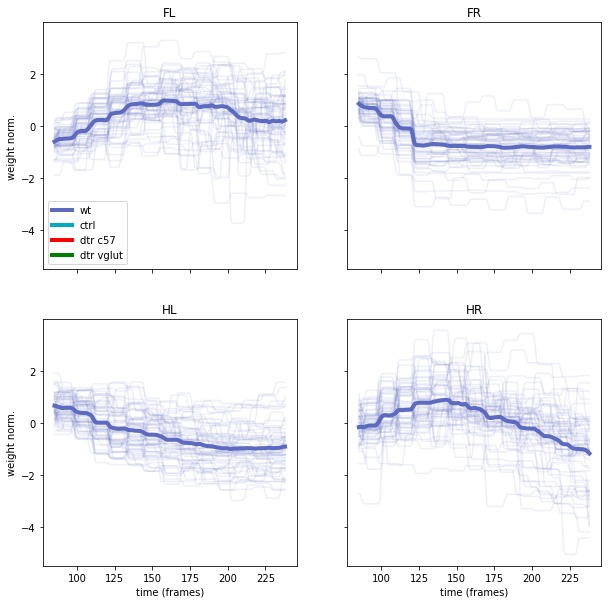

In [5]:

f, axarr = plt.subplots(2, 2, figsize=(10, 10), sharey=True, sharex=True)
axarr = axarr.flatten()
colors = (indigo, cyan_dark, salmon)

for i, ax in enumerate(axarr):
    # ax.plot(np.mean(wt_traces_complete, 2)[i, :], color=colors[0], lw=4, alpha=.15)
    # ax.plot(np.mean(ctrl_traces_complete, 2)[i, :], color=colors[1],  lw=4, alpha=.15)
    # ax.plot(np.mean(dtr_traces_complete, 2)[i, :], color=colors[2], lw=4, alpha=.15)

    ax.plot(np.arange(wt_avgtrace.shape[1]) + 85, wt_avgtrace[i, :], color=colors[0], lw=4, label="wt")
    ax.plot(np.arange(wt_avgtrace.shape[1]) + 85, ctrl_avgtrace[i, :], color=colors[1], lw=4, label="ctrl")
    ax.plot(np.arange(wt_avgtrace.shape[1]) + 85, dtrc57_avgtrace[i, :], color="red", lw=4, label="dtr c57")
    ax.plot(np.arange(wt_avgtrace.shape[1]) + 85, dtrvglut_avgtrace[i, :], color="green", lw=4, label="dtr vglut")

    for trial in range(wt_traces.shape[-1]):
        ax.plot(np.arange(wt_traces.shape[1]) + 85, wt_traces[i, :, trial], color=colors[0], alpha=.1)

axarr[0].set(ylabel="weight norm.", title="FL")
axarr[1].set(title="FR")
axarr[2].set(xlabel="time (frames)", ylabel="weight norm.", title="HL")
axarr[3].set(xlabel="time (frames)", title="HR")

axarr[0].legend()


## Fit

Fit to the average trace of the controls data.

Explained variation per principal component on average WT average trace: [0.60040202 0.3862957  0.01106306 0.00223921]


<Figure size 1152x648 with 1 Axes>

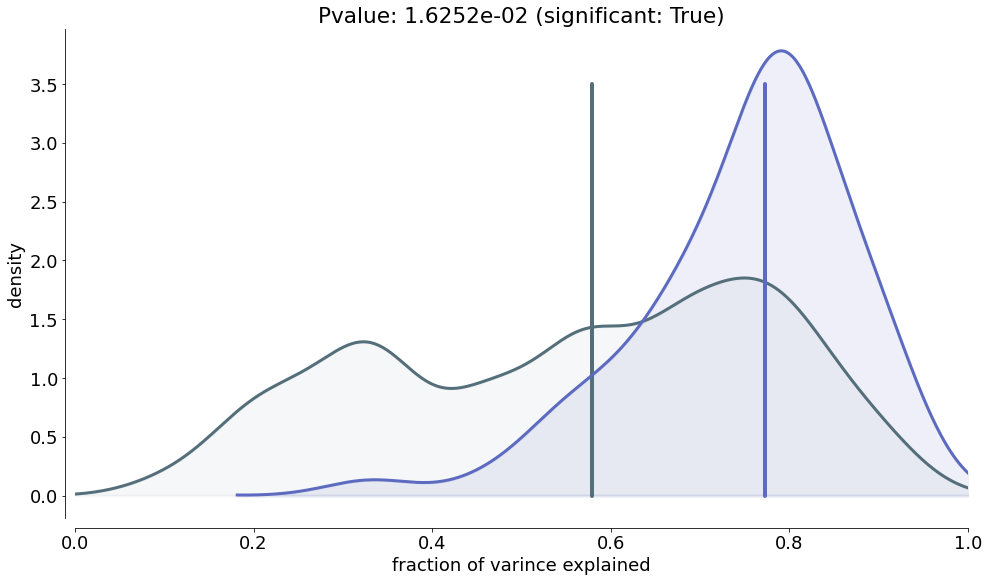

In [10]:
plt.rcParams.update({'font.size': 18})


# compare PCA to shuffled data
DOING = "WT"
pca = PCA(n_components=4).fit(average_traces[DOING].T)

# compute variance explained for mean trace
print(f'Explained variation per principal component on average {DOING} average trace: {pca.explained_variance_ratio_}')

# get variance explained for each trial
variance_explained = get_trials_variance_explained(pca, traces[DOING])
variance_explained_shuffled = get_trials_variance_explained(pca, traces[DOING], shuffle=True)


# Plot fraction of variance explained by first PC on WT and shuffled trials
f, ax = plt.subplots(figsize=(16, 9))
plot_variance_kde(ax, variance_explained_shuffled, color=blue_grey_dark, label="PC 1 - shuffled", alpha=.05)
plot_variance_kde(ax, variance_explained, color=indigo, label="PC 1 - trials", )

_, pval = ttest(variance_explained[0], variance_explained_shuffled[0])
ax.set(xlim=[0, 1], xlabel="fraction of varince explained", ylabel="density", title=f"Pvalue: {pval:.4e} (significant: {pval < 0.05})")
clean_axes(f)

# save figure
f.savefig(f"F:\\Egzona\\Thesis_Paper_Figures\\FC\\pca_variance_explained_{DOING}.png", dpi=300)

# Pearson correlation analysis

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<matplotlib.legend.Legend object at 0x000001F9447E39A0>

<Figure size 1152x648 with 1 Axes>

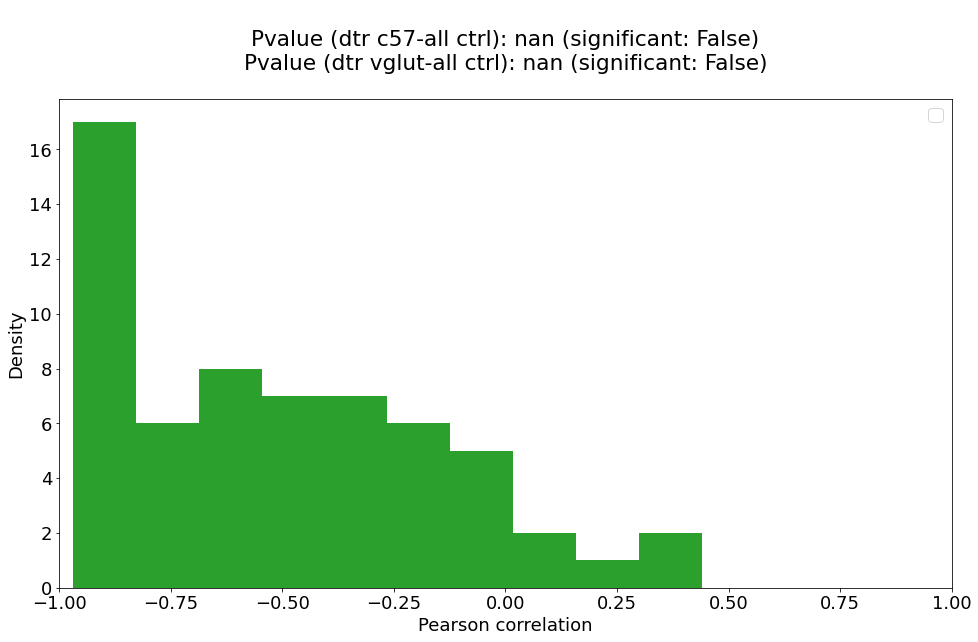

In [25]:
wt_traces = get_traces(WT, t0=85, t1=239, subtractbl=False)
ctrl_traces = get_traces(CTRL, t0=85, t1=239, subtractbl=False)
dtr_traces = get_traces(DTR, t0=85, t1=239, subtractbl=False)


# function to compute pearson correlation between two time series
def pearson_corr(x, y):
    return np.corrcoef(x, y)[0, 1]

f, ax = plt.subplots(figsize=(16, 9))

# compute pearson correlation for each trial in each condition
allcontrols = np.dstack([wt_traces, ctrl_traces])

paw1 = 0
paw2 = 2

wt_corrs = [pearson_corr(wt_traces[paw1, :, i], wt_traces[paw2, :, i]) for i in range(wt_traces.shape[2])]
ctrl_corrs = [pearson_corr(ctrl_traces[paw1, :, i], ctrl_traces[paw2, :, i]) for i in range(ctrl_traces.shape[2])]
dtr_corrs = [pearson_corr(dtr_traces[paw1, :, i], dtr_traces[paw2, :, i]) for i in range(dtr_traces.shape[2])]
dtr_c57_corrs = [pearson_corr(dtrc57_traces[paw1, :, i], dtrc57_traces[paw2, :, i]) for i in range(dtrc57_traces.shape[2])]
dtr_vglut_corrs = [pearson_corr(dtrvglut_traces[paw1, :, i], dtrvglut_traces[paw2, :, i]) for i in range(dtrvglut_traces.shape[2])]
allcontrols_corrs = [pearson_corr(allcontrols[paw1, :, i], allcontrols[paw2, :, i]) for i in range(allcontrols.shape[2])]

# _, pval_dtr = ttest(wt_corrs, dtr_corrs)
# _, pval_ctrl = ttest(wt_corrs, ctrl_corrs)
# _, pval_dtrctrl = ttest(dtr_corrs, ctrl_corrs)

_, pval_c57 = ttest(dtr_c57_corrs, allcontrols_corrs)
_, pval_vglut = ttest(dtr_vglut_corrs, allcontrols_corrs)

title = f"""
Pvalue (dtr c57-all ctrl): {pval_c57:.4e} (significant: {pval_c57 < 0.05})
Pvalue (dtr vglut-all ctrl): {pval_vglut:.4e} (significant: {pval_vglut < 0.05})
"""

names = ("DTR c57", "DTR vglut",  "ALLCTRL")
colors = ("red", "green",  "black")
correlations = (dtr_c57_corrs, dtr_vglut_corrs,  allcontrols_corrs)

for n, (name, color, corrs) in enumerate(zip(names, colors, correlations)):
    # plot_kde(ax, data=corrs, color=color, label=name, lw=3, alpha=.3, kde_kwargs=dict(bw=.05))
    ax.hist(corrs)

ax.set(xlim=[-1, 1],  xlabel="Pearson correlation", ylabel="Density", title=title)
ax.legend()

